In [57]:
import pandas as pd 
df1=pd.read_csv("billwerder_schadstoffe_2012-2023.csv")
df2=pd.read_csv("billwerder_wetter_2012-2023.csv")

In [58]:
df=pd.merge(df1, df2, on="Messzeit")

In [59]:
rolling_mean = df['Schwefeldioxid (µg/m3)'].rolling(window=7, min_periods=1).mean()
df['Schwefeldioxid Mittelwert'] = rolling_mean

In [60]:
df

,Unnamed: 0_x,Messzeit,Feinstaub (µg/m3),Schwefeldioxid (µg/m3),Stickstoffdioxid (µg/m3),Stickstoffmonoxid (µg/m3),Unnamed: 0_y,Temperatur (°C),rel. Luftfeuchte (%),Windgeschwindigkeit (m/s),Windrichtung (°),Luftdruck (hPa),Schwefeldioxid Mittelwert
0,0,02.01.2012,11.0,11.0,26.0,5.0,0,8.2,86.4,3.1,243.0,1003.5,11.000000
1,1,03.01.2012,10.0,5.0,16.0,4.0,1,5.6,84.3,5.2,211.0,1002.5,8.000000
2,2,04.01.2012,11.0,9.0,22.0,5.0,2,5.3,79.4,5.2,243.0,1001.0,8.333333
3,3,05.01.2012,12.0,5.0,17.0,5.0,3,5.8,82.3,5.3,272.0,980.3,7.500000
4,4,06.01.2012,11.0,3.0,30.0,7.0,4,3.9,79.0,3.3,301.0,1006.5,6.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132,4368,27.04.2023,14.0,3.0,25.0,4.0,4368,7.6,67.2,1.8,278.0,1019.2,3.000000
4133,4369,28.04.2023,20.0,3.0,17.0,2.0,4369,9.7,69.3,2.4,102.0,1013.1,3.000000
4134,4370,29.04.2023,14.0,3.0,7.0,2.0,4370,10.3,69.7,3.5,322.0,1015.8,3.000000
4135,4371,30.04.2023,16.0,3.0,13.0,2.0,4371,9.8,54.0,1.8,305.0,1022.5,3.000000


In [61]:
df.loc[df['Messzeit'] == "01.01.2020"]

,Unnamed: 0_x,Messzeit,Feinstaub (µg/m3),Schwefeldioxid (µg/m3),Stickstoffdioxid (µg/m3),Stickstoffmonoxid (µg/m3),Unnamed: 0_y,Temperatur (°C),rel. Luftfeuchte (%),Windgeschwindigkeit (m/s),Windrichtung (°),Luftdruck (hPa),Schwefeldioxid Mittelwert
2920,2921,01.01.2020,57.0,3.0,34.0,7.0,2921,0.6,95.7,1.1,200.0,1031.4,5.571429


In [62]:
df_train = df.iloc[:2920,:]
df_test = df.iloc[2920:,:]

In [63]:
df_test

,Unnamed: 0_x,Messzeit,Feinstaub (µg/m3),Schwefeldioxid (µg/m3),Stickstoffdioxid (µg/m3),Stickstoffmonoxid (µg/m3),Unnamed: 0_y,Temperatur (°C),rel. Luftfeuchte (%),Windgeschwindigkeit (m/s),Windrichtung (°),Luftdruck (hPa),Schwefeldioxid Mittelwert
2920,2921,01.01.2020,57.0,3.0,34.0,7.0,2921,0.6,95.7,1.1,200.0,1031.4,5.571429
2921,2922,02.01.2020,27.0,4.0,30.0,15.0,2922,-0.6,98.5,1.9,210.0,1024.0,5.571429
2922,2923,03.01.2020,10.0,5.0,19.0,2.0,2923,5.9,94.0,3.3,231.0,1013.9,5.857143
2923,2924,04.01.2020,15.0,4.0,17.0,2.0,2924,4.7,83.8,3.2,282.0,1020.7,6.000000
2924,2925,05.01.2020,18.0,5.0,27.0,2.0,2925,4.1,85.2,2.0,222.0,1030.3,6.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132,4368,27.04.2023,14.0,3.0,25.0,4.0,4368,7.6,67.2,1.8,278.0,1019.2,3.000000
4133,4369,28.04.2023,20.0,3.0,17.0,2.0,4369,9.7,69.3,2.4,102.0,1013.1,3.000000
4134,4370,29.04.2023,14.0,3.0,7.0,2.0,4370,10.3,69.7,3.5,322.0,1015.8,3.000000
4135,4371,30.04.2023,16.0,3.0,13.0,2.0,4371,9.8,54.0,1.8,305.0,1022.5,3.000000


In [64]:
df_train

,Unnamed: 0_x,Messzeit,Feinstaub (µg/m3),Schwefeldioxid (µg/m3),Stickstoffdioxid (µg/m3),Stickstoffmonoxid (µg/m3),Unnamed: 0_y,Temperatur (°C),rel. Luftfeuchte (%),Windgeschwindigkeit (m/s),Windrichtung (°),Luftdruck (hPa),Schwefeldioxid Mittelwert
0,0,02.01.2012,11.0,11.0,26.0,5.0,0,8.2,86.4,3.1,243.0,1003.5,11.000000
1,1,03.01.2012,10.0,5.0,16.0,4.0,1,5.6,84.3,5.2,211.0,1002.5,8.000000
2,2,04.01.2012,11.0,9.0,22.0,5.0,2,5.3,79.4,5.2,243.0,1001.0,8.333333
3,3,05.01.2012,12.0,5.0,17.0,5.0,3,5.8,82.3,5.3,272.0,980.3,7.500000
4,4,06.01.2012,11.0,3.0,30.0,7.0,4,3.9,79.0,3.3,301.0,1006.5,6.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2916,27.12.2019,7.0,3.0,27.0,8.0,2916,2.3,87.3,1.8,41.0,1030.3,3.857143
2916,2917,28.12.2019,11.0,3.0,32.0,23.0,2917,-0.8,91.1,1.1,148.0,1040.8,3.857143
2917,2918,29.12.2019,10.0,3.0,22.0,2.0,2918,-0.1,80.0,1.8,181.0,1035.6,3.857143
2918,2919,30.12.2019,12.0,20.0,29.0,2.0,2919,7.4,29.7,2.5,236.0,1025.0,5.714286


In [65]:
df_train = df_train.dropna()
df_test = df_test.dropna()

In [66]:
x_train = df_train.drop(columns=['Feinstaub (µg/m3)', 'Messzeit', 'Unnamed: 0_x', 'Stickstoffdioxid (µg/m3)', 'Stickstoffmonoxid (µg/m3)', 'Schwefeldioxid (µg/m3)', 'Unnamed: 0_y'])
y_train = df_train['Schwefeldioxid (µg/m3)']
x_test = df_test.drop(columns=['Feinstaub (µg/m3)', 'Messzeit', 'Unnamed: 0_x', 'Stickstoffdioxid (µg/m3)', 'Stickstoffmonoxid (µg/m3)', 'Schwefeldioxid (µg/m3)', 'Unnamed: 0_y'])
y_test = df_test['Schwefeldioxid (µg/m3)']


In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [68]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)

RandomForestRegressor()

In [69]:
y_pred = rf_regressor.predict(x_test)

In [70]:
mean_squared_error(y_test, y_pred, squared=False)

1.4487786361421435

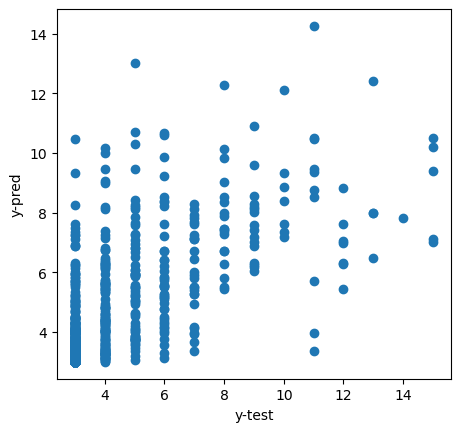

In [71]:
plt.scatter(y_test, y_pred)
plt.xlabel('y-test')
plt.ylabel('y-pred')
ax=plt.gca()
ax.set_aspect("equal")

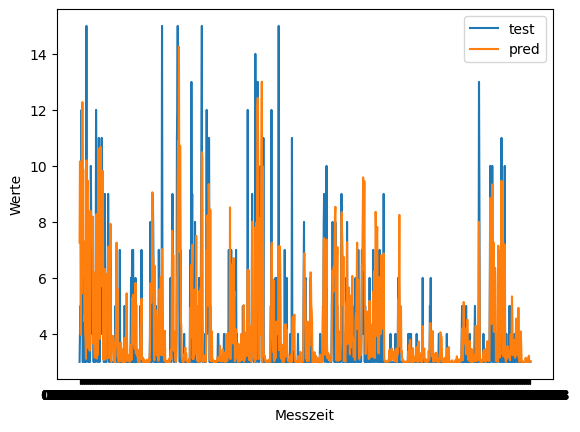

In [72]:
plt.plot(df_test['Messzeit'], y_test, label='test')
plt.plot(df_test['Messzeit'], y_pred, label='pred')
plt.xlabel('Messzeit')
plt.ylabel('Werte')
plt.legend()

Text(0, 0.5, 'Differenz')

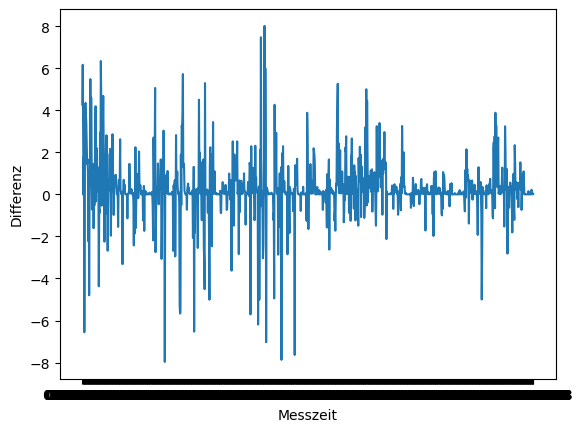

In [73]:
plt.plot(df_test['Messzeit'], y_pred-y_test)
plt.xlabel('Messzeit')
plt.ylabel('Differenz')

In [74]:
df_train.corr()

C:\Users\Praktikant\AppData\Local\Temp\ipykernel_8104\299540020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,Unnamed: 0_x,Feinstaub (µg/m3),Schwefeldioxid (µg/m3),Stickstoffdioxid (µg/m3),Stickstoffmonoxid (µg/m3),Unnamed: 0_y,Temperatur (°C),rel. Luftfeuchte (%),Windgeschwindigkeit (m/s),Windrichtung (°),Luftdruck (hPa),Schwefeldioxid Mittelwert
Unnamed: 0_x,1.000000,-0.046738,-0.023380,-0.108970,-0.083358,1.000000,0.099698,-0.017380,-0.010647,0.026875,0.004549,-0.049526
Feinstaub (µg/m3),-0.046738,1.000000,-0.070085,0.289336,0.269112,-0.046738,-0.058310,-0.016331,-0.230327,-0.184500,0.175175,-0.171959
Schwefeldioxid (µg/m3),-0.023380,-0.070085,1.000000,0.160367,0.036296,-0.023380,-0.109027,0.113244,0.181092,0.217802,-0.093780,0.514597
Stickstoffdioxid (µg/m3),-0.108970,0.289336,0.160367,1.000000,0.663529,-0.108970,-0.328988,0.259113,-0.430288,0.125581,0.154334,0.175352
Stickstoffmonoxid (µg/m3),-0.083358,0.269112,0.036296,0.663529,1.000000,-0.083358,-0.222197,0.177838,-0.369227,0.006682,0.172436,0.052053
Unnamed: 0_y,1.000000,-0.046738,-0.023380,-0.108970,-0.083358,1.000000,0.099698,-0.017380,-0.010647,0.026875,0.004549,-0.049526
Temperatur (°C),0.099698,-0.058310,-0.109027,-0.328988,-0.222197,0.099698,1.000000,-0.495292,-0.226695,0.061739,0.009405,-0.249241
rel. Luftfeuchte (%),-0.017380,-0.016331,0.113244,0.259113,0.177838,-0.017380,-0.495292,1.000000,-0.044075,0.057166,-0.206299,0.223711
Windgeschwindigkeit (m/s),-0.010647,-0.230327,0.181092,-0.430288,-0.369227,-0.010647,-0.226695,-0.044075,1.000000,0.027521,-0.209614,0.165523
Windrichtung (°),0.026875,-0.184500,0.217802,0.125581,0.006682,0.026875,0.061739,0.057166,0.027521,1.000000,-0.045483,0.201345
